# Assignment 1: My Heart Will Go On (but not yours?!?)

Today's assignment was inspired by a student's question, wondering if network analysis could be applied to the Titanic dataset. Instead of using the somewhat tragic dataset about surviving or perishing in the Titanic disaster, we will focus on the events leading up to it and try to solve the mystery behind why Rose didn't help Jack from dying.

<img title='Titanic' style="float: right;" src='https://www.firstforwomen.com/wp-content/uploads/sites/2/2024/09/kate-winslet-titanic.jpg?w=953&quality=86&strip=all' width="700">

We will use **James Cameron’s** 1997 film [Titanic](https://www.imdb.com/title/tt0120338/), starring Leonardo DiCaprio (as Jack) and Kate Winslet (as Rose). The film is based on a partly true story, though with a few inaccuracies.

One example is [Violet Jessop](https://www.youtube.com/watch?v=ERDHDAR3ZsU&ab_channel=titanicstories), a woman who survived the RMS Olympic (1911), RMS Titanic (1912), and later the HMHS Britannic (1916), which sank after hitting a German naval mine. In the film, she was depicted as an elderly Third-Class stewardess, instead of a First-Class stewardess who was about 24 years old.


### Dataset
Dataset consists of two files: **edges.csv** & **nodes.csv**. The names of the file should be selfexpenatory. Data was constructed from film's script, published [here](https://imsdb.com/scripts/Titanic.html), and present the coocurence of the characters in each scene. Both files are in the github repository of the assigment.  

In **edges.csv** the Weight column presents the number of coocurences for characters, and should be used in the assigment. 

## Instructions:

Follow all 4 objectives. For each objective, calculate and/or visualize the results, and provide explanations of **WHAT** you used to accomplish the task, **WHY** you chose that approach, and most importantly, your **understanding of the results**. **LET'S HYPOTHESIZE** that Rose could have saved Jack, so at the end, provide your reasoning as to why she didn't save him (there’s no right answer to this :)).

You can simply rename this file and submit it. If you'd like, you can also create a video presentation. Making a video is a great exercise for students who are struggling with oral exams.

Over the weekend, I will review the submissions, and at the beginning of next week, I will schedule a Teams meeting where we will slowly go through the objectives together.

HINT: Use Networx documentation!



## Objectives:
The primary objective is to construct a visual representation of a graph, representing the relationships and interactions among the characters in the Titanic dataset.

### 1. Graph Construction

In [42]:
pip install holoviews python_louvain

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for python_louvain: filename=python_louvain-0.16-py3-none-any.whl size=9388 sha256=b71588a38cd24edaa22e56110632e9b354274bbf307ecbb0966f87a9e4b7cb4f
  Stored in directory: /home/codespace/.cache/pip/wheels/40/f1/e3/485b698c520fa0baee1d07897abc7b8d6479b7d199ce96f4af
Successfully built python_louvain
Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import sparse
import networkx as nx
import holoviews as hv

# requests and io for dataimport
import requests
import io

In [14]:
# definition of url-paths for datasets
nodes_url = 'https://raw.githubusercontent.com/saoter/Ti_ta_nic/refs/heads/main/nodes.csv'
edges_url = 'https://raw.githubusercontent.com/saoter/Ti_ta_nic/refs/heads/main/edges.csv'

# loads urls into requests to download data
print("Downloading data... 1/2")
nodes_response = requests.get(nodes_url)
print("Downloading data... 2/2")
edges_response = requests.get(edges_url)

# convert the content (responses) to a file-like object using io.StringIO
# StringIO to import the data without saving as file
node_list = pd.read_csv(io.StringIO(nodes_response.text))
edge_list = pd.read_csv(io.StringIO(edges_response.text))
print("Data imported")

#G = nx.from_edgelist(edge_list)

Data imported


In [15]:
node_list

,Id,Label,Gender,movie_id,componentnumber,modularity_class
0,5097316,ROSE,F,828,0,0
1,5098095,JACK,M,828,0,3
2,5097875,CAL,M,828,0,5
3,5098619,MOLLY,F,828,0,4
4,5098545,SMITH,M,828,0,2
...,...,...,...,...,...,...
65,5098088,SVEN,M,828,0,3
66,5099267,TRANSITION,F,828,0,5
67,5098417,TRUDY,F,828,0,5
68,5100333,WAITER,M,828,0,1


In [16]:
edge_list


,Source,Target,Type,Id,Label,Weight,movie_id
0,5096932,5096969,Undirected,679,181587,1,828
1,5098606,5103789,Undirected,680,182039,1,828
2,5098606,5098095,Undirected,681,182094,1,828
3,5098606,5101061,Undirected,682,182036,1,828
4,5098606,5097941,Undirected,683,182037,1,828
...,...,...,...,...,...,...,...
294,5098463,5097941,Undirected,973,182033,1,828
295,5098463,5097994,Undirected,974,182112,1,828
296,5098463,5098041,Undirected,975,181667,1,828
297,5102939,5097875,Undirected,976,182000,1,828


In [17]:
# Merge edge_list with node_list to replace Source IDs with Labels
edge_list = edge_list.merge(node_list[['Id', 'Label']], left_on='Source', right_on='Id', suffixes=('', '_source'))
edge_list['Source'] = edge_list['Label_source']  # Update Source with the new Label
edge_list = edge_list.drop(['Id', 'Label_source'], axis=1)  # Drop unnecessary columns after merge




In [18]:
edge_list = edge_list.merge(node_list[['Id', 'Label']], left_on='Target', right_on='Id', suffixes=('', '_Target'))
edge_list['Target'] = edge_list['Label_Target']  # Update Source with the new Label
edge_list = edge_list.drop(['Id', 'Label_Target'], axis=1)  # Drop unnecessary columns after merge

In [19]:
edge_list

,Source,Target,Type,Label,Weight,movie_id,Id_source
0,ANATOLY,LOVETT,Undirected,181587,1,828,5096932
1,ANDREWS,IDA,Undirected,182039,1,828,5098606
2,ANDREWS,JACK,Undirected,182094,1,828,5098606
3,ANDREWS,LIGHTOLLER,Undirected,182036,1,828,5098606
4,ANDREWS,LOVEJOY,Undirected,182037,1,828,5098606
...,...,...,...,...,...,...,...
294,WOMAN,LOVEJOY,Undirected,182033,1,828,5098463
295,WOMAN,MAN,Undirected,182112,1,828,5098463
296,WOMAN,OLD ROSE,Undirected,181667,1,828,5098463
297,WOMAN IN CROWD,CAL,Undirected,182000,1,828,5102939


In [20]:
node_list

,Id,Label,Gender,movie_id,componentnumber,modularity_class
0,5097316,ROSE,F,828,0,0
1,5098095,JACK,M,828,0,3
2,5097875,CAL,M,828,0,5
3,5098619,MOLLY,F,828,0,4
4,5098545,SMITH,M,828,0,2
...,...,...,...,...,...,...
65,5098088,SVEN,M,828,0,3
66,5099267,TRANSITION,F,828,0,5
67,5098417,TRUDY,F,828,0,5
68,5100333,WAITER,M,828,0,1


In [21]:

G = nx.Graph()
# Add nodes with attributes from the nodes CSV
for _, row in node_list.iterrows():
    G.add_node(row['Label'], gender=row['Gender'], movie_id=row['movie_id'],
               component_number=row['componentnumber'], modularity_class=row['modularity_class'])

# Add edges with attributes from the edges CSV
for _, row in edge_list.iterrows():
    G.add_edge(row['Source'], row['Target'], type=row['Type'],
               label=row['Label'], weight=row['Weight'], movie_id=row['movie_id'])

G.nodes()

NodeView(('ROSE', 'JACK', 'CAL', 'MOLLY', 'SMITH', 'LIGHTOLLER', 'LOVETT', 'LOVEJOY', 'ANDREWS', 'RUTH', 'OLD ROSE', 'BODINE', 'FABRIZIO', 'WOMAN', 'ISMAY', 'MURDOCH', 'STEWARD', 'BUELL', 'FLEET', 'LEE', 'SIR COSMO', 'MOODY', 'STEWARD #2', 'GRACIE', 'TOMMY', 'MAN', 'BRIDE', 'FIRST OFFICER MURDOCH', 'ROWE', 'COLONEL GRACIE', 'HITCHINS', 'LIZZY', 'MASTER AT ARMS', 'STEWARD BARNES', 'HUTCHINSON', 'LOWE', 'ANATOLY', 'ANNOUNCER', 'BARRETT', 'BELL', 'BROCK', 'CAMERAMAN', 'CNN REPORTER', 'CREWMAN', 'DANIEL', 'FATHER BYLES', 'GENTLEMAN', 'GUGGENHEIM', 'HARTLEY', 'HELGA', 'HUSBAND', 'IDA', 'IMMIGRATION OFFICER', 'JOUGHIN', 'LITTLE BOY', 'MADELEINE', 'MARVIN', 'MOTHER', 'OLAF', 'OPERATOR', 'PHILLIPS', 'PORTER', 'PUBKEEPER', 'REPORTER', 'SEAMAN', 'SVEN', 'TRANSITION', 'TRUDY', 'WAITER', 'WOMAN IN CROWD'))

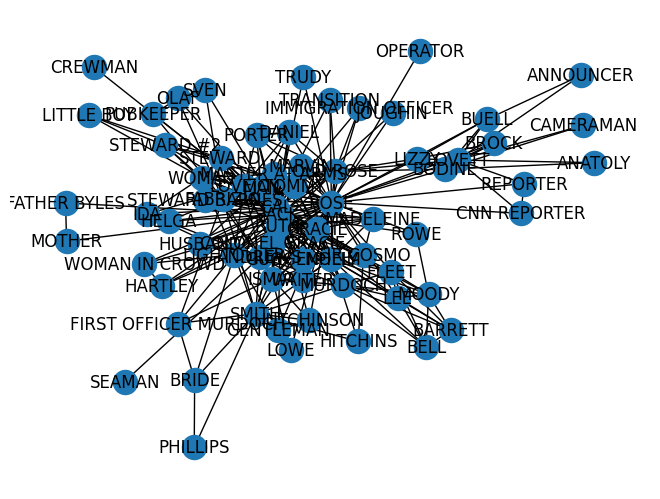

In [22]:
G_layout = nx.layout.fruchterman_reingold_layout(G)
# We use the standard networkx plot, and pass the layout.
nx.draw(G, pos = G_layout, with_labels=True)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
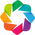

In [23]:
# Import the libraries and link to the bokeh backend
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

In [24]:
cent_degree = dict(nx.degree(G))

In [25]:
cent_degree.values()

dict_values([46, 39, 33, 23, 15, 18, 11, 19, 17, 25, 15, 8, 12, 12, 16, 12, 9, 6, 8, 8, 8, 8, 6, 15, 7, 11, 4, 5, 3, 12, 3, 6, 8, 7, 5, 3, 2, 2, 6, 6, 5, 2, 3, 1, 7, 2, 4, 10, 4, 3, 5, 5, 3, 2, 3, 7, 6, 2, 4, 1, 2, 7, 4, 3, 1, 4, 3, 2, 10, 4])

In [26]:
sorted(cent_degree.items(),key=lambda x:-x[1])[:10]

[('ROSE', 46),
 ('JACK', 39),
 ('CAL', 33),
 ('RUTH', 25),
 ('MOLLY', 23),
 ('LOVEJOY', 19),
 ('LIGHTOLLER', 18),
 ('ANDREWS', 17),
 ('ISMAY', 16),
 ('SMITH', 15)]

In [27]:
nx.set_node_attributes(G, cent_degree, 'cent_degree')

g_plot = hv.Graph.from_networkx(G, G_layout).opts(tools=['hover'],
                                                  node_size='cent_degree')

show(hv.render(g_plot))

### 2. Graph Analysis
Determinate the basic graph indicators:
**Total number of nodes and edges**: to understand the *scale and complexity* of the graph
**Average degree**: giving an average of *connections per node*
**Graph density**:  providing an insight into the *overall connectivity*

In [28]:
# a basic information about the graph
print(f"Graph info:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Graph density: {nx.density(G)}") # how close a graph is to being a complete graph
print(f"Graph is directed: {G.is_directed()}")

Graph info:
Number of nodes: 70
Number of edges: 299
Graph density: 0.12380952380952381
Graph is directed: False


In [29]:
average_degree = (2 * G.number_of_edges()) /G.number_of_nodes() 

print("Average Degree:", average_degree)

Average Degree: 8.542857142857143


### 3. Node analysis
Calculate basic centralities and compare the most central characters.

In [30]:
cent_eigen = dict(nx.eigenvector_centrality(G))
print(cent_eigen)
sorted(cent_eigen.items(),key=lambda x:-x[1])[:10]

{'ROSE': 0.34087722891204286, 'JACK': 0.31545304952687403, 'CAL': 0.30375511132308497, 'MOLLY': 0.2326201649340831, 'SMITH': 0.14233650892590302, 'LIGHTOLLER': 0.18098802163739114, 'LOVETT': 0.047005418805586174, 'LOVEJOY': 0.20624631016766715, 'ANDREWS': 0.20798359784530093, 'RUTH': 0.2669400985784739, 'OLD ROSE': 0.15545157101134185, 'BODINE': 0.04336403533142487, 'FABRIZIO': 0.10573244512371341, 'WOMAN': 0.1375087176308602, 'ISMAY': 0.18689641735756293, 'MURDOCH': 0.10910956831637621, 'STEWARD': 0.11429543134072932, 'BUELL': 0.03343755836802762, 'FLEET': 0.07947103717177478, 'LEE': 0.07947103717177478, 'SIR COSMO': 0.11770640998017402, 'MOODY': 0.061454885837930816, 'STEWARD #2': 0.05127852646026344, 'GRACIE': 0.19572954192362202, 'TOMMY': 0.09281534297049475, 'MAN': 0.14287252403397638, 'BRIDE': 0.024544666677744305, 'FIRST OFFICER MURDOCH': 0.041807875248707146, 'ROWE': 0.046852771692366145, 'COLONEL GRACIE': 0.17573824588866294, 'HITCHINS': 0.03215812110733024, 'LIZZY': 0.0426410

[('ROSE', 0.34087722891204286),
 ('JACK', 0.31545304952687403),
 ('CAL', 0.30375511132308497),
 ('RUTH', 0.2669400985784739),
 ('MOLLY', 0.2326201649340831),
 ('ANDREWS', 0.20798359784530093),
 ('LOVEJOY', 0.20624631016766715),
 ('GRACIE', 0.19572954192362202),
 ('ISMAY', 0.18689641735756293),
 ('LIGHTOLLER', 0.18098802163739114)]

In [31]:
for  i in cent_eigen:
  cent_eigen[i] = cent_eigen[i]*100

In [32]:
nx.set_node_attributes(G, cent_eigen, 'cent_eigen')

g_plot = hv.Graph.from_networkx(G, G_layout).opts(tools=['hover'],
                                                  node_size='cent_eigen' )

show(hv.render(g_plot))

In [43]:
import community.community_louvain as community_louvain
com = community_louvain.best_partition(G)
max(com.values())

nx.set_node_attributes(G, com, 'community')

g_plot = hv.Graph.from_networkx(G, G_layout).opts(tools=['hover'],
                                                  node_size='cent_degree',
                                                  node_color='community', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

### 4. Node attributes
Add Gender attribute (from dataset to the network) and calculate and/or visualize the share of females and males characters in the film. Furthermore, subgraph network to only male characters. Who are the main characters, what is their relationship?



## FINAL ANSWER AND ARGUMENTATION